# Análise para anos finais

Aqui vamos fazer as mesmas análises feitas no notebook escolas2017_diffFeatures_xgboost e escolas2017_xgboost. Com a diferença que aqui vamos usar para anos finais. 

A ideia inicial é verificar se a localidade das escolas para anos finais é importante igual para os anos finais, e logo a seguir verificar quais parâmetros da escola em si são importantes

### Ingestão de Dados e Tratamento Inicial

In [131]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [132]:
pd_escolas2017_final = pd.read_csv('./escolas2017_anosFinais.csv', encoding='latin-1')

/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (216,217) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f1798713b38>>
Traceback (most recent call last):
  File "/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


In [133]:
#Ordenando as escolas por nota do IDEB e vendo qual a nota das 25% melhores
pd_escolas2017_final = pd_escolas2017_final.sort_values(by = 'Ideb2017', ascending=False)

pd_escolas2017_final['Ideb2017'].describe()

count    25523.000000
mean         4.430757
std          0.932722
min          0.900000
25%          3.800000
50%          4.500000
75%          5.100000
max          8.500000
Name: Ideb2017, dtype: float64

In [134]:
#Agora vamos classificar entre ser e não ser as top 25
pd_escolas2017_final['isTop25'] = pd_escolas2017_final.Ideb2017.apply(lambda x: x > 5.1)
pd_escolas2017_final[['regiao', 'unidade_federativa','municipio','nome_escola','Ideb2017']].head(10)
#olhando so por curiosidade mesmo

,regiao,unidade_federativa,municipio,nome_escola,Ideb2017
5020,Nordeste,CearÃÂ¡,Granja,NOSSA SENHORA APARECIDA EEF,8.5
5247,Nordeste,CearÃÂ¡,Sobral,ARAUJO CHAVES,8.5
8855,Nordeste,Pernambuco,Recife,COLEGIO DE APLICACAO DO CE DA UFPE,8.5
8812,Nordeste,Pernambuco,Recife,ESCOLA DE APLICACAO DO RECIFE - FCAP UPE,8.4
9432,Nordeste,Alagoas,Coruripe,ESCOLA DE EDUCACAO BASICA VEREADOR JOSE WILSON...,8.1
6850,Nordeste,CearÃÂ¡,Sobral,ANTONIO CUSTODIO DE AZEVEDO EFEI,8.1
5248,Nordeste,CearÃÂ¡,Sobral,FRANCISCO MONTE,8.0
5513,Nordeste,CearÃÂ¡,Itatira,EDUARDO BARBOSA ESCOLA MUNICIPAL DE ENSINO FUN...,8.0
5237,Nordeste,CearÃÂ¡,Sobral,VICENTE ANTENOR,7.9
10721,Nordeste,Bahia,Salvador,COLEGIO MILITAR DE SALVADOR,7.9


In [135]:
#colunas de features que indicam rendimentos anteriores (enviesa nossas análises)
rendimento2drop = ['TaxaAprovacao2005_6ao9ano','TaxaAprovacao2005_6ano', 'TaxaAprovacao2005_7ano', 
                   'TaxaAprovacao2005_8ano', 'TaxaAprovacao2005_9ano', 'IndicadorRendimento_2005',
                   'TaxaAprovacao2007_6ao9ano', 'TaxaAprovacao2007_6ano','TaxaAprovacao2007_7ano',
                   'TaxaAprovacao2007_8ano', 'TaxaAprovacao2007_9ano','IndicadorRendimento_2007',
                   'TaxaAprovacao2009_6ao9ano', 'TaxaAprovacao2009_6ano', 'TaxaAprovacao2009_7ano', 
                   'TaxaAprovacao2009_8ano', 'TaxaAprovacao2009_9ano', 'IndicadorRendimento_2009', 
                   'TaxaAprovacao2011_6ao9ano', 'TaxaAprovacao2011_6ano', 'TaxaAprovacao2011_7ano',
                   'TaxaAprovacao2011_8ano', 'TaxaAprovacao2011_9ano', 'IndicadorRendimento_2011',
                   'TaxaAprovacao2013_6ao9ano', 'TaxaAprovacao2013_6ano', 'TaxaAprovacao2013_7ano',
                   'TaxaAprovacao2013_8ano', 'TaxaAprovacao2013_9ano', 'IndicadorRendimento_2013',
                   'TaxaAprovacao2015_6ao9ano', 'TaxaAprovacao2015_6ano', 'TaxaAprovacao2015_7ano',
                   'TaxaAprovacao2015_8ano', 'TaxaAprovacao2015_9ano', 'IndicadorRendimento_2015',
                   'TaxaAprovacao2017_6ao9ano', 'TaxaAprovacao2017_6ano', 'TaxaAprovacao2017_7ano', 
                   'TaxaAprovacao2017_8ano', 'TaxaAprovacao2017_9ano','IndicadorRendimento_2017',
                   'NotaProvaBrasil_MT_2005', 'NotaProvaBrasil_LP_2005', 'NotaProvaBrasil_NotaMedia_2005', 
                   'NotaProvaBrasil_MT_2007', 'NotaProvaBrasil_LP_2007', 'NotaProvaBrasil_NotaMedia_2007', 
                   'NotaProvaBrasil_MT_2009', 'NotaProvaBrasil_LP_2009', 'NotaProvaBrasil_NotaMedia_2009', 
                   'NotaProvaBrasil_MT_2011', 'NotaProvaBrasil_LP_2011', 'NotaProvaBrasil_NotaMedia_2011', 
                   'NotaProvaBrasil_MT_2013', 'NotaProvaBrasil_LP_2013', 'NotaProvaBrasil_NotaMedia_2013',
                   'NotaProvaBrasil_MT_2015', 'NotaProvaBrasil_LP_2015', 'NotaProvaBrasil_NotaMedia_2015',
                   'NotaProvaBrasil_MT_2017', 'NotaProvaBrasil_LP_2017', 'NotaProvaBrasil_NotaMedia_2017',
                   'Ideb2005', 'Ideb2007', 'Ideb2009', 'Ideb2011', 'Ideb2013', 'Ideb2015', 'Ideb2017',
                   'ProjecaoIdeb2007','ProjecaoIdeb2009', 'ProjecaoIdeb2011', 'ProjecaoIdeb2013', 
                   'ProjecaoIdeb2015', 'ProjecaoIdeb2017', 'ProjecaoIdeb2019', 'ProjecaoIdeb2021']
pd_escolas2017_final = pd_escolas2017_final.drop(labels=rendimento2drop, axis=1)

In [136]:
#Agora vamos dropar colunas redundantes
red_2drop = ['tp_dependencia', 'tp_rede_publica', 'rede_publica_desc', 'tp_rede', 
             'tp_rede_nome', 'tp_rede_cod', 'tp_categoria_escola_privada', 'in_conveniada_pp',
            'tp_convenio_poder_publico', 'tp_convenio_poder_publico_desc', 'tp_ocupacao_predio_escolar',
            'tp_localizacao_diferenciada', 'tp_localizacao', 'tp_categoria_escola_privada_desc']

pd_escolas2017_final = pd_escolas2017_final.drop(labels=red_2drop, axis = 1)

In [137]:
pd_escolas2017_final.head()

,cod_escola_inep,regiao,unidade_federativa,mesoregiao,microregiao,municipio,tp_dependencia_desc,in_somente_matriculas_ac_ou_aee,nome_escola,num_matriculas,...,in_material_esp_nao_utiliza,in_educacao_indigena,in_brasil_alfabetizado,in_final_semana,in_formacao_alternancia,cod_municipio,num_matriculas_ensino_integral,num_estudantes_ensino_integral,tp_integral,isTop25
5020,23005785,Nordeste,CearÃÂ¡,Noroeste Cearense,Litoral de Camocim e AcaraÃÂº,Granja,Municipal,False,NOSSA SENHORA APARECIDA EEF,215.0,...,True,False,False,False,False,2304707,41.0,41.0,True,True
5247,23026340,Nordeste,CearÃÂ¡,Noroeste Cearense,Sobral,Sobral,Municipal,False,ARAUJO CHAVES,231.0,...,True,False,False,False,False,2312908,10.0,10.0,True,True
8855,26124297,Nordeste,Pernambuco,Metropolitana de Recife,Recife,Recife,Federal,False,COLEGIO DE APLICACAO DO CE DA UFPE,415.0,...,True,False,False,False,False,2611606,0.0,0.0,False,True
8812,26119730,Nordeste,Pernambuco,Metropolitana de Recife,Recife,Recife,Estadual,False,ESCOLA DE APLICACAO DO RECIFE - FCAP UPE,238.0,...,True,False,False,False,False,2611606,1.0,1.0,True,True
9432,27042863,Nordeste,Alagoas,Leste Alagoano,SÃÂ£o Miguel dos Campos,Coruripe,Municipal,False,ESCOLA DE EDUCACAO BASICA VEREADOR JOSE WILSON...,892.0,...,True,False,False,False,False,2702306,202.0,202.0,True,True


### Criando novas features

In [138]:
#Razao de estudantes dos anos iniciais e finais
pd_escolas2017_final['ratio_inicial'] = pd_escolas2017_final['num_estudantes_ensino_fund_anos_iniciais']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_final'] = pd_escolas2017_final['num_estudantes_ensino_fund_anos_finais']/pd_escolas2017_final['num_estudantes']

#estudantes por turma
pd_escolas2017_final['ratio_est_turma'] = pd_escolas2017_final['num_estudantes']/pd_escolas2017_final['num_turmas']

#ratio salas ocupadas
pd_escolas2017_final['ratio_salas_ocupadas'] = pd_escolas2017_final['num_salas_utilizadas']/pd_escolas2017_final['num_salas_existentes']

#Computador por aluno e por funcionario (cada um com seu pc)
pd_escolas2017_final['ratio_pc_aluno'] = pd_escolas2017_final['num_comp_aluno']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_pc_func'] = pd_escolas2017_final['num_comp_administrativo']/pd_escolas2017_final['num_funcionarios']

#razao de # de pcs, aluno/funcionario, aluno/total, funcionario/total
pd_escolas2017_final['ratio__pcAluno_pc_Func'] = pd_escolas2017_final['num_comp_aluno']/pd_escolas2017_final['num_comp_administrativo']
pd_escolas2017_final['ratio_pcaluno_total'] = pd_escolas2017_final['num_comp_aluno']/pd_escolas2017_final['num_computador']
pd_escolas2017_final['ratio_pcfunc_total'] = pd_escolas2017_final['num_comp_administrativo']/pd_escolas2017_final['num_computador']

#Funcionarios por aluno
pd_escolas2017_final['ratio_func_aluno'] = pd_escolas2017_final['num_funcionarios']/pd_escolas2017_final['num_estudantes']

#Professores (total) por aluno
pd_escolas2017_final['ratio_prof_aluno'] = pd_escolas2017_final['num_professores']/pd_escolas2017_final['num_estudantes']

#professores inici/prof finais
pd_escolas2017_final['ratio_profIni_profFim'] = pd_escolas2017_final['num_professores_em_regencia_fund_ai']/pd_escolas2017_final['num_professores_em_regencia_fund_af']

#Professores anos iniciais por aluno anos iniciais e o mesmo pros anos finais
pd_escolas2017_final['ratio_profini_alunoini'] = pd_escolas2017_final['num_professores_em_regencia_fund_ai']/pd_escolas2017_final['num_estudantes_ensino_fund_anos_iniciais']
pd_escolas2017_final['ratio_proffim_alunofim'] = pd_escolas2017_final['num_professores_em_regencia_fund_af']/pd_escolas2017_final['num_estudantes_ensino_fund_anos_finais']

#Ratio alunos integral / alunos
pd_escolas2017_final['ratio_integral_total'] = pd_escolas2017_final['num_estudantes_ensino_integral']/pd_escolas2017_final['num_estudantes']

#Quantos dos funcionarios sao professores
pd_escolas2017_final['ratio_func_prof'] = pd_escolas2017_final['num_funcionarios']/pd_escolas2017_final['num_professores']

#Turmas por sala ocupada (quanto mais salas livres mais espaço tem a escola?)
pd_escolas2017_final['tumar_sala'] = pd_escolas2017_final['num_turmas']/pd_escolas2017_final['num_salas_existentes']

#Matricula vs estudando (mede evasão talvez) total e integrais
pd_escolas2017_final['ratio_matr_estudando'] = pd_escolas2017_final['num_matriculas']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_matr_estudando_int'] = pd_escolas2017_final['num_matriculas_ensino_integral']/pd_escolas2017_final['num_estudantes_ensino_integral']

#Equipamentos por aluno:
pd_escolas2017_final['ratio_tv_aluno'] = pd_escolas2017_final['num_equip_tv']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_retroproj_aluno'] = pd_escolas2017_final['num_equip_retroprojetor']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_impre_aluno'] = pd_escolas2017_final['num_equip_impressora']/pd_escolas2017_final['num_estudantes']
pd_escolas2017_final['ratio_copiad_aluno'] = pd_escolas2017_final['num_equip_copiadora']/pd_escolas2017_final['num_estudantes']

### Separação de Feature e Label

In [139]:
#label
y = pd_escolas2017_final['isTop25']
y = y.reset_index(drop=True)

#Features
X = pd_escolas2017_final

#Colunas que não fazem sentido ser features
dropNoFeature = ['cod_escola_inep', 'mesoregiao', 'microregiao', 'municipio', 'nome_escola', 'cod_municipio']
X = X.drop(labels=dropNoFeature, axis=1)

#dropando o label
X = X.drop(labels=['isTop25'], axis = 1)
X = X.reset_index(drop=True)

Verificando consistencia

In [140]:
X.head(2)

,regiao,unidade_federativa,tp_dependencia_desc,in_somente_matriculas_ac_ou_aee,num_matriculas,num_estudantes,in_comum_creche,in_comum_pre,in_comum_fund_ai,in_comum_fund_af,...,ratio_proffim_alunofim,ratio_integral_total,ratio_func_prof,tumar_sala,ratio_matr_estudando,ratio_matr_estudando_int,ratio_tv_aluno,ratio_retroproj_aluno,ratio_impre_aluno,ratio_copiad_aluno
0,Nordeste,CearÃÂ¡,Municipal,False,215.0,174.0,True,True,True,True,...,0.209302,0.235632,1.607143,2.0,1.235632,1.0,0.005747,0.0,0.000000,0.0
1,Nordeste,CearÃÂ¡,Municipal,False,231.0,218.0,True,True,True,True,...,0.065789,0.045872,2.400000,2.0,1.059633,1.0,0.013761,0.0,0.004587,0.0


In [141]:
y.head(2)

0    True
1    True
Name: isTop25, dtype: bool

In [142]:
pd_escolas2017_final.head(2)

,cod_escola_inep,regiao,unidade_federativa,mesoregiao,microregiao,municipio,tp_dependencia_desc,in_somente_matriculas_ac_ou_aee,nome_escola,num_matriculas,...,ratio_proffim_alunofim,ratio_integral_total,ratio_func_prof,tumar_sala,ratio_matr_estudando,ratio_matr_estudando_int,ratio_tv_aluno,ratio_retroproj_aluno,ratio_impre_aluno,ratio_copiad_aluno
5020,23005785,Nordeste,CearÃÂ¡,Noroeste Cearense,Litoral de Camocim e AcaraÃÂº,Granja,Municipal,False,NOSSA SENHORA APARECIDA EEF,215.0,...,0.209302,0.235632,1.607143,2.0,1.235632,1.0,0.005747,0.0,0.000000,0.0
5247,23026340,Nordeste,CearÃÂ¡,Noroeste Cearense,Sobral,Sobral,Municipal,False,ARAUJO CHAVES,231.0,...,0.065789,0.045872,2.400000,2.0,1.059633,1.0,0.013761,0.0,0.004587,0.0


## Análise com dados regionais


### One Hot Encoding c/ regiao
Agora vamos tratar variaveis categoricas deixando variaveis que classifiquem regioes

In [143]:
#labels categoricos
list_toEncoding_region = ['tp_dependencia_desc', 'tp_localizacao_desc', 'tp_ocupacao_predio_escolar_desc', 
                   'tp_localizacao_diferenciada_desc', 'regiao', 'unidade_federativa']

#Separando em outro dataframe
df_encoding_region = pd_escolas2017_final[list_toEncoding_region]
df_encoding_region = df_encoding_region.reset_index(drop=True)

In [144]:
#E jogando fora temporariamente (criando uma nova feature com reigao)
X_region = X.drop(labels=list_toEncoding_region, axis=1)

Aplicando one hot encoding

enc_reg = OneHotEncoder(handle_unknown='ignore')
ohe_reg = enc_reg.fit_transform(df_encoding_region).toarray()
name_reg = enc_reg.get_feature_names()
df_hotencoding_reg = pd.DataFrame(data = ohe_reg, columns=name_reg)

Reunindo os dados

In [145]:
X_region = X_region.join(df_hotencoding_reg, how='outer')

Verificando a consistencia (novamente)

In [146]:
pd_escolas2017_final[['municipio','tp_dependencia_desc', 'num_matriculas','tp_localizacao_desc', 'isTop25']].head(3)

,municipio,tp_dependencia_desc,num_matriculas,tp_localizacao_desc,isTop25
5020,Granja,Municipal,215.0,Rural,True
5247,Sobral,Municipal,231.0,Rural,True
8855,Recife,Federal,415.0,Urbana,True


In [147]:
X_region[['num_matriculas', 'x0_Municipal', 'x1_Rural']].head(3)

,num_matriculas,x0_Municipal,x1_Rural
0,215.0,1.0,1.0
1,231.0,1.0,1.0
2,415.0,0.0,0.0


Ok tudo parece consistente, podemos rodar o alg de predição com as features regionais

### Boost com features regionais
inicialmente sem tunning de parâmetros 

In [148]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import itertools
import xgboost as xgb

In [149]:
#Train Test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_region, y, test_size=0.50)

In [150]:
#Rodando o modelo
model_reg = XGBClassifier()
model_reg.fit(X_train_reg, y_train_reg)

#Verificando a acuracia
y_pred = model.predict(X_test_reg)
accuracy = accuracy_score(y_test_reg, y_pred)
accuracy

0.8017552107820091

### Shap com features regionais

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f17987134e0>>
Traceback (most recent call last):
  File "/home/marcelostachuk/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 366, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


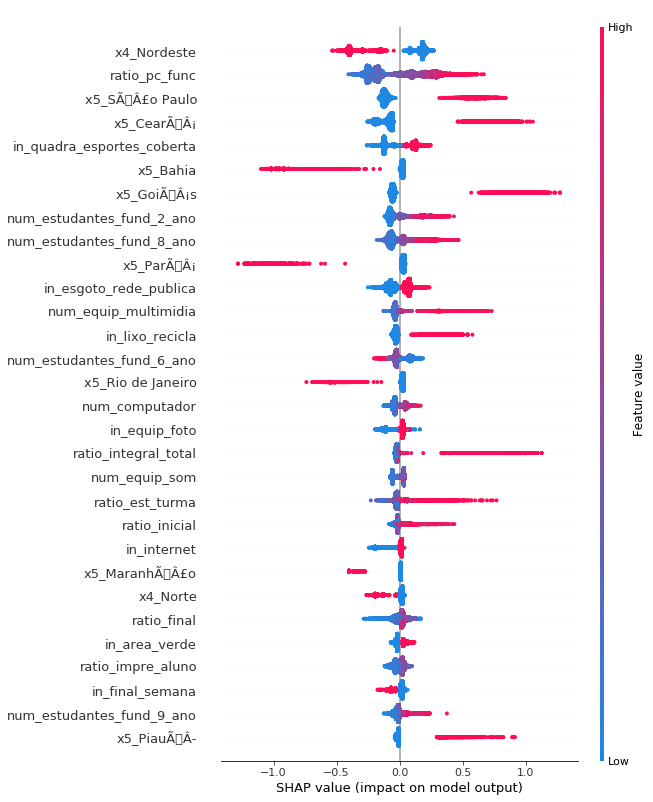

In [151]:
import shap

def shapplot(features, model, num_display):
    # load JS visualization code to notebook
    shap.initjs()

    # explain the model's predictions using SHAP values
    # (same syntax works for LightGBM, CatBoost, and scikit-learn models)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(features)

    shap.summary_plot(shap_values, features, max_display=num_display)

shapplot(X_region, model_reg, 30)

## Análise sem dados regionais
### One Hot Enconding

In [152]:
#labels categoricos
list_toEncoding_noregion = ['tp_dependencia_desc', 'tp_localizacao_desc', 'tp_ocupacao_predio_escolar_desc', 
                   'tp_localizacao_diferenciada_desc']

#Separando em outro dataframe
df_encoding_noregion = pd_escolas2017_final[list_toEncoding_noregion]
df_encoding_noregion = df_encoding_noregion.reset_index(drop=True)

In [153]:
#Jogando fora features de regiao
region =  ['regiao', 'unidade_federativa']
X_noregion = X.drop(labels=region, axis=1)

#E as features categoricas (temporariamente)
X_noregion = X_noregion.drop(labels=list_toEncoding_noregion, axis=1)

Aplicando o one hot encoding

In [154]:
enc_noreg = OneHotEncoder(handle_unknown='ignore')
ohe_noreg = enc_noreg.fit_transform(df_encoding_noregion).toarray()
name_noreg = enc_noreg.get_feature_names()
df_hotencoding_noreg = pd.DataFrame(data = ohe_noreg, columns=name_noreg)

Reunindo os dados

In [155]:
X_noregion = X_noregion.join(df_hotencoding_noreg, how='outer')

### Boost sem features regionais
inicialmente sem tunning de parâmetros 

In [159]:
#Train Test split
X_train_noreg, X_test_noreg, y_train_noreg, y_test_noreg = train_test_split(X_noregion, y, test_size=0.50)

In [166]:
#Rodando o modelo
model_noreg = XGBClassifier()
model_noreg.fit(X_train_noreg, y_train_noreg)

#Verificando a acuracia
y_pred_noreg = model_noreg.predict(X_test_noreg)
accuracy_noreg = accuracy_score(y_test_noreg, y_pred_noreg)
accuracy_noreg

0.7936060178655383

### Shap sem features regionais

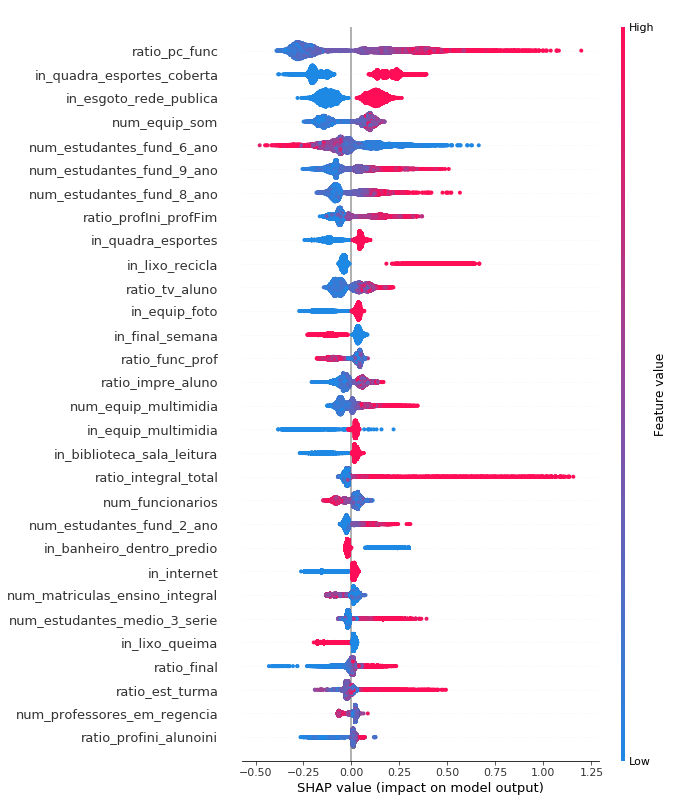

In [167]:
shapplot(X_noregion, model_noreg, 30)

In [186]:
# Para futuras aplicações
def model_boost(feature_train, label_train):
    model = XGBClassifier()
    model.fit(feature_train, label_train)
    return model

def model_accurary(model, feature_test, label_test):
    label_pred = model.predict(feature_test)
    mod_accuracy = accuracy_score(label_test, label_pred)
    print(mod_accuracy)

### Data cleaning
Vamos tirar colunas que provavelmente não ajudam (ou não deveriam ajudar) e ver como o algoritmo performa. E fazer isso continuamente até reduzir bem o set de paramentros

In [216]:
labels2reduce = ['num_estudantes_fund_1_ano', 'num_estudantes_fund_2_ano', 'num_estudantes_fund_3_ano', 
                 'num_estudantes_fund_4_ano', 'num_estudantes_fund_5_ano', 'num_equip_som',
                'in_quadra_esportes_coberta', 'ratio_pc_func', 'num_estudantes_ensino_fund_anos_iniciais']
X_labelsreduced1 = X_noregion.drop(labels=labels2reduce, axis=1)

In [217]:
X_train_lred1, X_test_lred1, y_train_lred1, y_test_lred1 = train_test_split(X_labelsreduced1, y, test_size=0.50)
model_labelreduced1 = model_boost(X_train_lred1, y_train_lred1)
model_accurary(model_labelreduced1, X_test_lred1, y_test_lred1)

0.7943895941075066


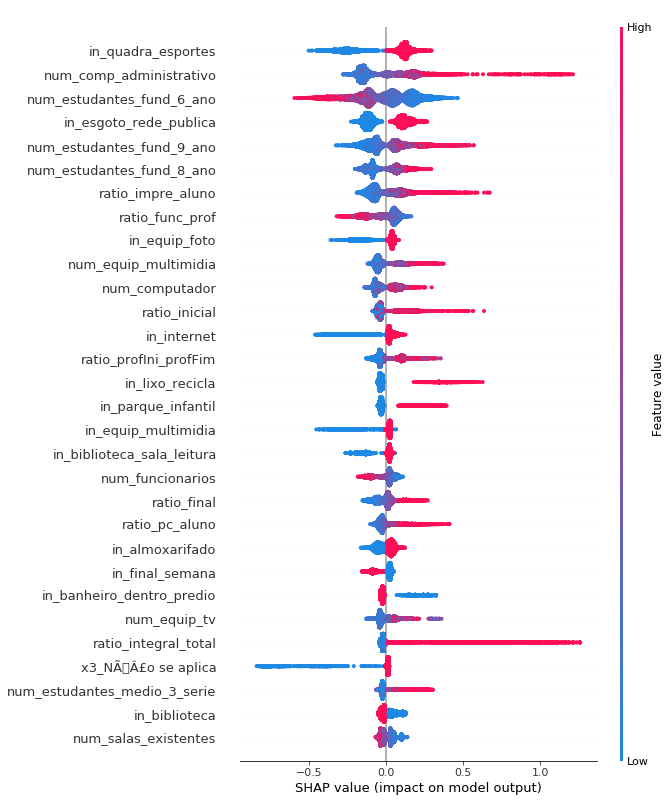

In [218]:
shapplot(X_labelsreduced1, model_labelreduced1, 30)

In [228]:
labels2reduce2 = ['ratio_func_prof', 'num_estudantes', 'num_equip_multimidia','num_comp_administrativo',
                  'x3_NÃ\x83Â£o se aplica', 'x3_Terra indÃ\x83Â\xadgena', 'x3_Unidade de uso sustentÃ\x83Â¡vel',
                  'x3_Unidade de uso sustentÃ\x83Â¡vel em Ã\x83Â¡rea remanescente de quilombos', 
                  'x3_Ã\x83Â\x81rea de assentamento', 'x3_Ã\x83Â\x81rea remanescente de quilombos',
                 'ratio_profIni_profFim', 'ratio_profini_alunoini', 'in_parque_infantil', 'ratio_inicial',
                 'num_professores_em_regencia_fund_ai']

X_labelsreduced2 = X_labelsreduced1.drop(labels=labels2reduce2, axis=1)

In [229]:
X_train_lred2, X_test_lred2, y_train_lred2, y_test_lred2 = train_test_split(X_labelsreduced2, y, test_size=0.50)
model_labelreduced2 = model_boost(X_train_lred2, y_train_lred2)
model_accurary(model_labelreduced2, X_test_lred2, y_test_lred2)

0.7924306535025858


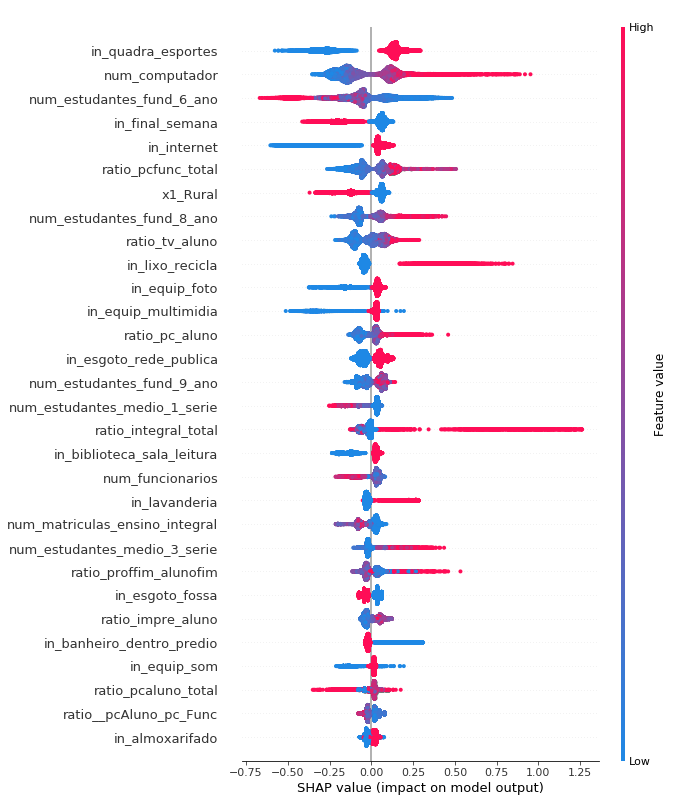

In [230]:
shapplot(X_labelsreduced2, model_labelreduced2, 30)

In [234]:
labels2reduce3 = ['ratio_pcfunc_total','num_estudantes_medio_1_serie', 'num_estudantes_medio_2_serie',
                 'num_estudantes_medio_3_serie','num_estudantes_medio_4_serie', 'ratio__pcAluno_pc_Func',
                 'in_quadra_esportes']

X_labelsreduced3 = X_labelsreduced2.drop(labels=labels2reduce3, axis=1)

In [236]:
X_train_lred3, X_test_lred3, y_train_lred3, y_test_lred3 = train_test_split(X_labelsreduced3, y, test_size=0.50)
model_labelreduced3 = model_boost(X_train_lred3, y_train_lred3)
model_accurary(model_labelreduced3, X_test_lred3, y_test_lred3)

0.7911769315154364


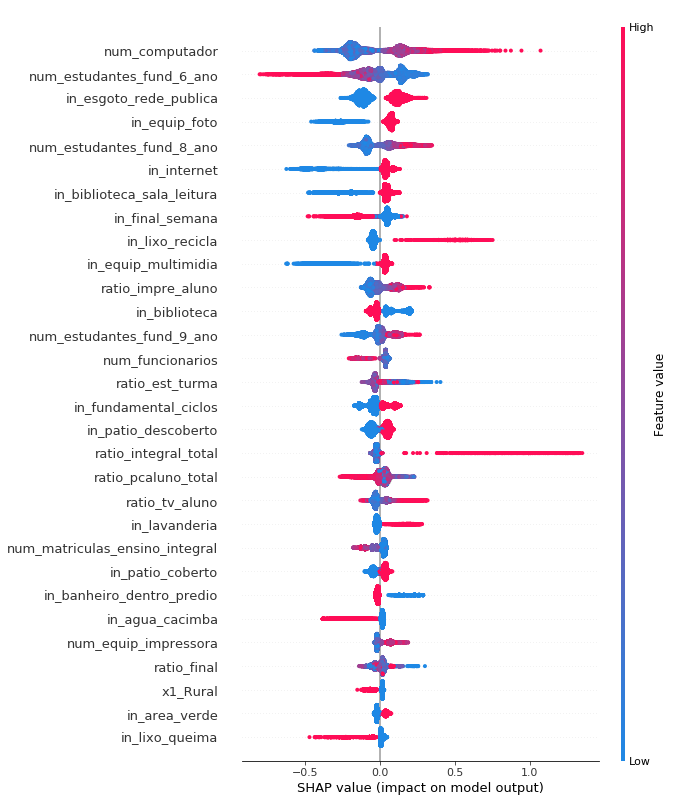

In [238]:
shapplot(X_labelsreduced3, model_labelreduced3, 30)